In [1]:
#Bibliotecas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import fnmatch
import math
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Data para séries temporais aleatórias

In [46]:
y = pd.DataFrame() #base para criação do data set aleatório
n_serie = 50 #numero de séries aleatórias desejadas


for ii in range(0,n_serie): #loop para criar as séries temporais com constantes diferentes por ARIMAS
    arparams = np.array([np.random.uniform(0,1), np.random.uniform(0,1)])
    maparams = np.array([np.random.uniform(0,1), np.random.uniform(0,1)])
    ar = np.r_[1, arparams]
    ma = np.r_[1, maparams] 
    y[str(ii)] = sm.tsa.arma_generate_sample(ar, ma, 250)

Para agrupar as séries temporais por similaridade é usado a biblioteca "TimeSeriesKMeans" de tslearn. Uma maneira de avaliar o número ideal de clusters é minimizando o espalhamento dos dados no centro, pela função em questão é por uma métrica "inertia" dada após o clustering. Nos dados em questão é possível minimizar de forma crescente aumentando o número de clusters, porém muitos terão apenas 1 série no conjunto. Invés de minimizar o valor, é visto quando a diferença da métrica se aproxima de zero primeiro.

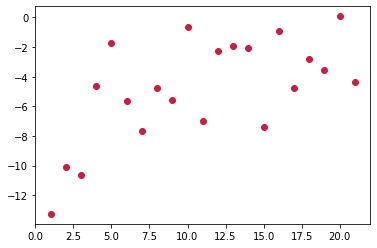

In [48]:
inertia = []

for jj in range(3,math.ceil(n_serie/2)):
    cluster_count = jj #sugestão para numero de clusters para ser analisados
    km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")
    labels_y = km.fit_predict(y.transpose().values)
    model = km.fit(y.transpose().values)
    inertia.append(model.inertia_)

plt.plot(pd.DataFrame(inertia).diff(), marker = 'o',ls="", color='#C91D42') #gráfico para visualizar o ponto ótimo
plt.show()

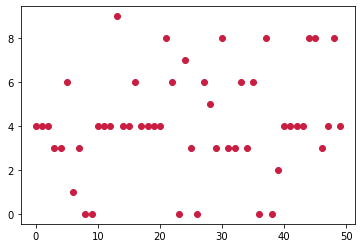

In [49]:
#Resultado do clustering

cluster_count = 10 #sugestão para numero de clusters para ser analisados pelo gráfico anterior
km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw") #usando a métrica "Dynamic Time Warping"
labels_y = km.fit_predict(y.transpose().values)

plt.plot(labels_y,marker ='o',ls="",color='#C91D42')

plt.show()

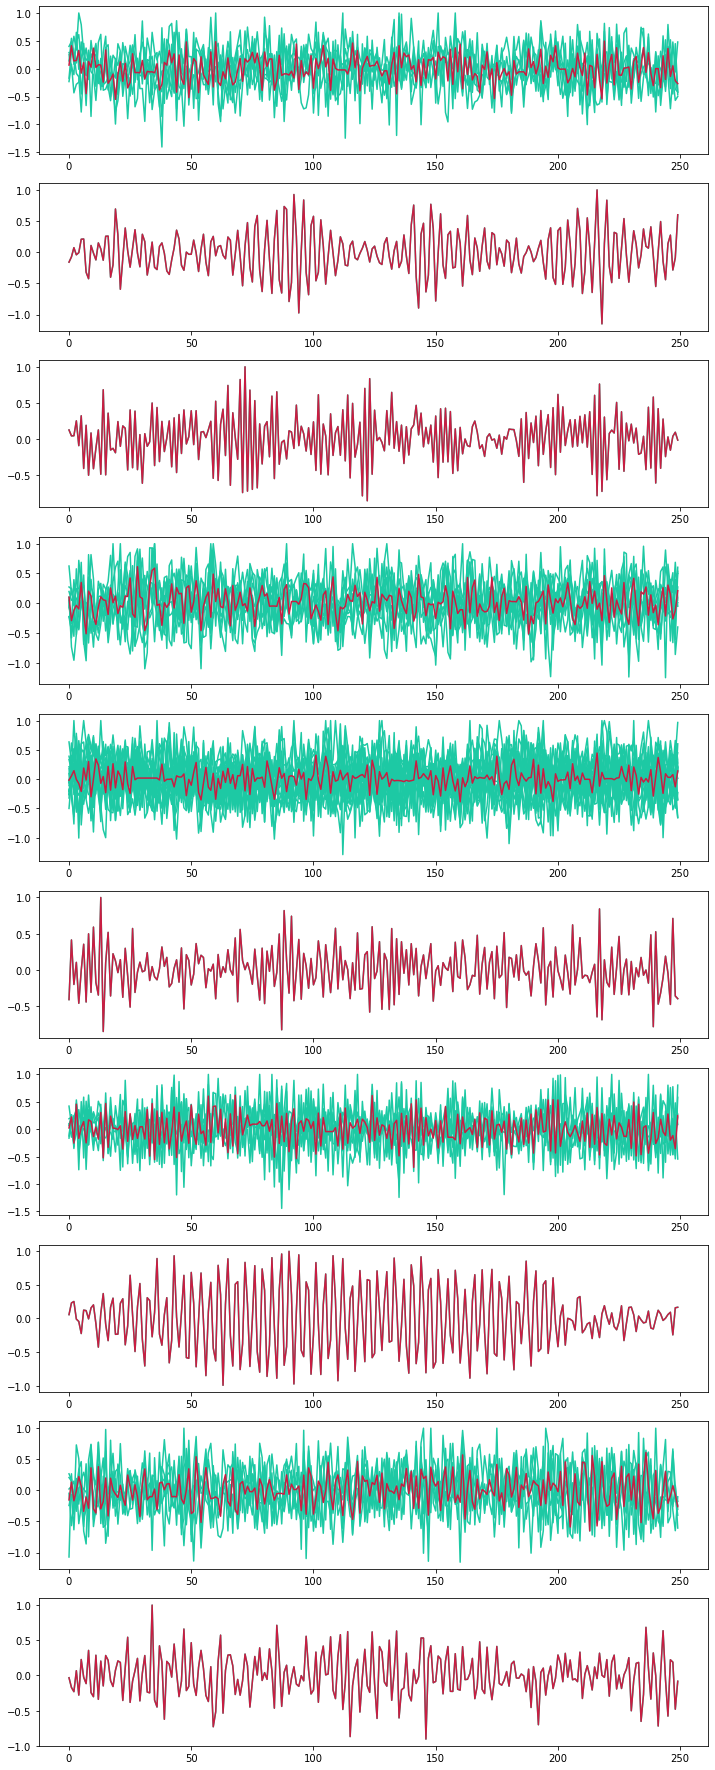

In [50]:
fig, ax = plt.subplots(cluster_count,1,figsize=(12,32))

for ii in range(cluster_count):
    pp = [] #array auxiliar para o plot do centro do clustering
    for i in range(0,50,1):
        if labels_y[i] == ii:
            ax[ii].plot(y[str(i)]/y[str(i)].max(), color="#1DC9A4") #plot da normalização dos dados para visualização
            pp.append(y[str(i)])
    ax[ii].plot(dtw_barycenter_averaging(np.vstack(pp))/np.amax(pp), color="#C91D42") #plot do centro do clustering
            
plt.show()

Séries com distribuições unicas acabam sendo agrupadas sozinhas em alguns cluster enquanto a maioria são agrupadas em clusters maiores.